In [4]:
#Librerias 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:


sns.set_theme(style="whitegrid")
notebook_dir = os.getcwd() # Directorio donde está el notebook
project_root = os.path.dirname(notebook_dir) # Asumimos que 'notebooks' está en la raíz
processed_data_path = os.path.join(project_root, 'data', 'processed', 'netflix_viewing_enriched.csv')

print(f"Cargando datos desde: {processed_data_path}")

try:
    df = pd.read_csv(processed_data_path)
    print("¡Datos cargados exitosamente!")
except FileNotFoundError:
    print(f"Error: No se encontró el archivo en {processed_data_path}. Verifica la ruta.")
    # Detener aquí si no se cargan los datos
    raise SystemExit("Archivo no encontrado.")
except Exception as e:
    print(f"Error al cargar el archivo CSV: {e}")
    raise SystemExit("Error cargando CSV.")


# --- Inspección Inicial ---
print("\n--- Información General del DataFrame ---")
df.info()

print("\n--- Primeras 5 Filas ---")
display(df.head()) # display() funciona mejor en Jupyter para DataFrames

print("\n--- Columnas Actuales ---")
print(df.columns.tolist())

print("\n--- Estadísticas Descriptivas (Numéricas) ---")
display(df.describe())

print("\n--- Conteo de Tipos de Medio (Movie/TV) ---")
print(df['tmdb_media_type'].value_counts(dropna=False)) # dropna=False para ver también los NaN si los hay


Cargando datos desde: h:\git\Analisis-de_consumo_Netflix\Analisis-de_consumo_Netflix\data\processed\netflix_viewing_enriched.csv
¡Datos cargados exitosamente!

--- Información General del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  1874 non-null   object 
 1   Date                   1874 non-null   object 
 2   Title_Cleaned_For_API  1874 non-null   object 
 3   tmdb_id                1856 non-null   float64
 4   tmdb_title             1856 non-null   object 
 5   tmdb_original_title    1856 non-null   object 
 6   tmdb_overview          1762 non-null   object 
 7   tmdb_genres            1827 non-null   object 
 8   tmdb_popularity        1856 non-null   float64
 9   tmdb_vote_average      1856 non-null   float64
 10  tmdb_vote_count        1856 non-null   float64
 11  tmdb_media

,Title,Date,Title_Cleaned_For_API,tmdb_id,tmdb_title,tmdb_original_title,tmdb_overview,tmdb_genres,tmdb_popularity,tmdb_vote_average,tmdb_vote_count,tmdb_media_type,tmdb_release_date,tmdb_runtime_minutes
0,La casa de papel: Parte 5: La teoría de la ele...,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
1,La casa de papel: Parte 5: Ciencia ilusionada,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
2,La casa de papel: Parte 5: Válvulas de escape,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
3,La casa de papel: Parte 5: Vivir muchas vidas,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
4,La casa de papel: Parte 5: Tu sitio en el cielo,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0



--- Columnas Actuales ---
['Title', 'Date', 'Title_Cleaned_For_API', 'tmdb_id', 'tmdb_title', 'tmdb_original_title', 'tmdb_overview', 'tmdb_genres', 'tmdb_popularity', 'tmdb_vote_average', 'tmdb_vote_count', 'tmdb_media_type', 'tmdb_release_date', 'tmdb_runtime_minutes']

--- Estadísticas Descriptivas (Numéricas) ---


,tmdb_id,tmdb_popularity,tmdb_vote_average,tmdb_vote_count,tmdb_runtime_minutes
count,1.856000e+03,1856.000000,1856.000000,1856.000000,1856.000000
mean,1.845862e+05,25.895284,7.299446,2418.564116,42.938039
std,2.638451e+05,35.317841,1.409748,4854.056133,40.925070
min,3.060000e+02,0.007100,0.000000,0.000000,0.000000
25%,1.125000e+04,4.527700,6.800000,26.000000,0.000000
50%,9.479600e+04,7.391200,7.455000,364.000000,30.000000
75%,2.466440e+05,38.239100,8.098500,1609.000000,84.000000
max,1.466807e+06,181.049200,10.000000,22178.000000,283.000000



--- Conteo de Tipos de Medio (Movie/TV) ---
tmdb_media_type
tv       1302
movie     554
NaN        18
Name: count, dtype: int64


In [6]:
# --- Renombrar Columnas ---

# Diccionario de mapeo: {'Nombre_Viejo': 'Nombre_Nuevo_Español'}
column_mapping_es = {
    'Title': 'Titulo_Original_Netflix',
    'Date': 'Fecha_Visualizacion',
    'Title_Cleaned_For_API': 'Titulo_Limpio_Busqueda', # O quizás 'Titulo_Serie_Pelicula'
    'tmdb_id': 'ID_TMDb',
    'tmdb_title': 'Titulo_TMDb',
    'tmdb_original_title': 'Titulo_Original_TMDb',
    'tmdb_overview': 'Resumen_TMDb',
    'tmdb_genres': 'Generos_TMDb', # String separado por comas
    'tmdb_popularity': 'Popularidad_TMDb',
    'tmdb_vote_average': 'Calificacion_Promedio_TMDb',
    'tmdb_vote_count': 'Cantidad_Votos_TMDb',
    'tmdb_media_type': 'Tipo_Medio_TMDb', # 'tv' o 'movie'
    'tmdb_release_date': 'Fecha_Estreno_TMDb',
    'tmdb_runtime_minutes': 'Duracion_Minutos_TMDb' # Recordar la limitación para TV
}

# Aplicar el renombrado
df.rename(columns=column_mapping_es, inplace=True)

print("\n--- Columnas Después de Renombrar ---")
print(df.columns.tolist())

# Ver las primeras filas con los nombres nuevos
print("\n--- Primeras Filas con Nombres en Español ---")
display(df.head())


--- Columnas Después de Renombrar ---
['Titulo_Original_Netflix', 'Fecha_Visualizacion', 'Titulo_Limpio_Busqueda', 'ID_TMDb', 'Titulo_TMDb', 'Titulo_Original_TMDb', 'Resumen_TMDb', 'Generos_TMDb', 'Popularidad_TMDb', 'Calificacion_Promedio_TMDb', 'Cantidad_Votos_TMDb', 'Tipo_Medio_TMDb', 'Fecha_Estreno_TMDb', 'Duracion_Minutos_TMDb']

--- Primeras Filas con Nombres en Español ---


,Titulo_Original_Netflix,Fecha_Visualizacion,Titulo_Limpio_Busqueda,ID_TMDb,Titulo_TMDb,Titulo_Original_TMDb,Resumen_TMDb,Generos_TMDb,Popularidad_TMDb,Calificacion_Promedio_TMDb,Cantidad_Votos_TMDb,Tipo_Medio_TMDb,Fecha_Estreno_TMDb,Duracion_Minutos_TMDb
0,La casa de papel: Parte 5: La teoría de la ele...,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
1,La casa de papel: Parte 5: Ciencia ilusionada,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
2,La casa de papel: Parte 5: Válvulas de escape,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
3,La casa de papel: Parte 5: Vivir muchas vidas,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0
4,La casa de papel: Parte 5: Tu sitio en el cielo,2025-05-05,La casa de papel,71446.0,Money Heist,La casa de papel,"To carry out the biggest heist in history, a m...","Crime, Drama",38.2391,8.237,18882.0,tv,2017-05-02,0.0


In [7]:
# --- Eliminamoss las columnas que no necesitamos ----

# Lista de columnas a eliminar 
cols_to_drop = [
    'Titulo_Original_TMDb',
    'Resumen_TMDb',
    #'Popularidad_TMDb',       # Descomenta si quieres quitarla también
    #'Cantidad_Votos_TMDb',    # Descomenta si quieres quitarla también
    #'Titulo_Limpio_Busqueda', # Descomenta si quieres quitarla también
]

# Guardamos las dimensiones antes de eliminar
rows_before_drop = df.shape[0]
cols_before_drop = df.shape[1]

# Eliminamos las columnas (usamos errors='ignore' por si alguna no existe)
df.drop(columns=cols_to_drop, inplace=True, errors='ignore')

print(f"\n--- Columnas Eliminadas: {', '.join(cols_to_drop)} ---")
print(f"Dimensiones antes: {rows_before_drop} filas, {cols_before_drop} columnas")
print(f"Dimensiones ahora: {df.shape[0]} filas, {df.shape[1]} columnas")
print("Columnas restantes:", df.columns.tolist())


--- Columnas Eliminadas: Titulo_Original_TMDb, Resumen_TMDb ---
Dimensiones antes: 1874 filas, 14 columnas
Dimensiones ahora: 1874 filas, 12 columnas
Columnas restantes: ['Titulo_Original_Netflix', 'Fecha_Visualizacion', 'Titulo_Limpio_Busqueda', 'ID_TMDb', 'Titulo_TMDb', 'Generos_TMDb', 'Popularidad_TMDb', 'Calificacion_Promedio_TMDb', 'Cantidad_Votos_TMDb', 'Tipo_Medio_TMDb', 'Fecha_Estreno_TMDb', 'Duracion_Minutos_TMDb']


In [8]:

# Instalar dependencias si es necesario
%pip install pandas numpy

import os
import pandas as pd
import numpy as np
from IPython.display import display

# --- Configuración de Rutas ---
# Asumimos que el notebook está en la carpeta 'notebooks'
# y los datos en 'data/processed' dentro de la raíz del proyecto
try:
    # Esta estructura es común si el notebook está en 'notebooks/'
    notebook_dir = os.getcwd() # Directorio donde está el notebook
    project_root = os.path.dirname(notebook_dir) # Sube un nivel a la raíz del proyecto
except NameError:
    # Fallback si os.getcwd() no está definido (ej. en algunos entornos de ejecución no interactivos)
    # O si la estructura es diferente, ajusta esta ruta manualmente si es necesario.
    project_root = '.' # Asume que el script/notebook se ejecuta desde la raíz del proyecto

input_csv_filename = 'netflix_eda_processed.csv' # El archivo que subiste
input_csv_path = os.path.join(project_root, 'data', 'processed', input_csv_filename)

print(f"Intentando cargar datos desde: {input_csv_path}")

# --- 1. Cargar el Dataset ---
try:
    df = pd.read_csv(input_csv_path, low_memory=False)
    print(f"Archivo '{input_csv_filename}' cargado exitosamente.")
    print(f"Dimensiones iniciales: {df.shape[0]} filas, {df.shape[1]} columnas.")
except FileNotFoundError:
    print(f"ERROR: No se encontró el archivo en '{input_csv_path}'. Verifica la ruta.")
    # Si el archivo no se encuentra, no podemos continuar.
    # En un notebook, podrías detener la ejecución aquí o manejarlo de otra forma.
    raise
except Exception as e:
    print(f"Ocurrió un error al cargar el CSV: {e}")
    raise

# --- 2. Re-Conversión de Tipos de Datos (Importante al cargar de CSV) ---
# Las fechas se leen como strings desde CSV, hay que reconvertirlas.
# Las columnas numéricas con NaNs pueden leerse como float, podemos intentar Int64.

print("\n--- Reconvirtiendo tipos de datos ---")
date_columns = ['Fecha_Visualizacion', 'Fecha_Estreno_TMDb']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce') # 'coerce' pone NaT si no puede parsear
        print(f"Columna '{col}' convertida a datetime.")
    else:
        print(f"Advertencia: Columna de fecha '{col}' no encontrada.")

nullable_int_cols = ['ID_TMDb', 'Cantidad_Votos_TMDb', 'Duracion_Minutos_TMDb'] # Duración también puede ser Int
for col in nullable_int_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').astype('Int64')
        print(f"Columna '{col}' convertida a Int64 (nullable).")
    else:
        print(f"Advertencia: Columna numérica '{col}' no encontrada.")

# --- 3. Creación de Columnas Basadas en Fecha de Visualización ---
print("\n--- Creando columnas de características de fecha ---")
if 'Fecha_Visualizacion' in df.columns:
    df.dropna(subset=['Fecha_Visualizacion'], inplace=True) # Trabajar solo con filas con fecha válida

    df['Anio_Visualizacion'] = df['Fecha_Visualizacion'].dt.year
    df['Mes_Visualizacion_Num'] = df['Fecha_Visualizacion'].dt.month
    df['Dia_Del_Mes_Visualizacion'] = df['Fecha_Visualizacion'].dt.day
    df['Dia_Semana_Visualizacion_Num'] = df['Fecha_Visualizacion'].dt.dayofweek # Lunes=0, Domingo=6
    df['Semana_Del_Anio_Visualizacion'] = df['Fecha_Visualizacion'].dt.isocalendar().week.astype(int) # Semana ISO

    # Nombres de mes y día en español (mapeo para evitar problemas de locale)
    meses_es = {1: '01_Enero', 2: '02_Febrero', 3: '03_Marzo', 4: '04_Abril', 5: '05_Mayo', 6: '06_Junio',
                7: '07_Julio', 8: '08_Agosto', 9: '09_Septiembre', 10: '10_Octubre', 11: '11_Noviembre', 12: '12_Diciembre'}
    dias_es = {0: '1_Lunes', 1: '2_Martes', 2: '3_Miércoles', 3: '4_Jueves', 4: '5_Viernes', 5: '6_Sábado', 6: '7_Domingo'}

    df['Mes_Visualizacion_Nombre'] = df['Mes_Visualizacion_Num'].map(meses_es)
    df['Dia_Semana_Visualizacion_Nombre'] = df['Dia_Semana_Visualizacion_Num'].map(dias_es)
    print("Columnas de Año, Mes (Num/Nombre), Día del Mes, Día de Semana (Num/Nombre), Semana del Año creadas.")
else:
    print("ERROR: Columna 'Fecha_Visualizacion' no encontrada, no se pueden crear características de fecha.")

# --- 4. Procesamiento de Géneros ---
print("\n--- Procesando columna de Géneros ---")
if 'Generos_TMDb' in df.columns:
    # Convertir el string de géneros en una lista de strings
    # Primero rellenamos NaN con un string vacío para que .split no dé error
    df['Lista_Generos_TMDb'] = df['Generos_TMDb'].fillna('').astype(str).apply(lambda x: [genre.strip() for genre in x.split(',') if genre.strip()] if x else [])
    # Si Generos_TMDb era 'Desconocido' (por el fillna anterior), la lista será ['Desconocido']
    # Si era un string vacío (por este fillna), la lista será vacía []
    print("Columna 'Lista_Generos_TMDb' creada (lista de strings).")
else:
    print("Advertencia: Columna 'Generos_TMDb' no encontrada, no se pudo crear 'Lista_Generos_TMDb'.")

# --- 5. Indicador de Enriquecimiento ---
print("\n--- Creando indicador de enriquecimiento ---")
if 'ID_TMDb' in df.columns:
    df['Fue_Enriquecido_TMDb'] = df['ID_TMDb'].notna()
    print("Columna 'Fue_Enriquecido_TMDb' (booleana) creada.")
else:
    print("Advertencia: Columna 'ID_TMDb' no encontrada, no se pudo crear 'Fue_Enriquecido_TMDb'.")

# --- 6. (Opcional) Categorización de Duración para Películas ---
print("\n--- Creando categorías de duración para películas (opcional) ---")
if 'Duracion_Minutos_TMDb' in df.columns and 'Tipo_Medio_TMDb' in df.columns:
    # Definir los límites y etiquetas para las categorías
    bins = [-1, 59, 90, 120, np.inf] # -1 para incluir 0, np.inf para "infinito"
    labels = ['1_Cortometraje (<1h)', '2_Duración Media (1h-1.5h)', '3_Larga (1.5h-2h)', '4_Muy Larga (>2h)']
    
    # Aplicar solo a películas
    # Creamos la columna inicializada con NaN o un valor por defecto
    df['Categoria_Duracion_Pelicula'] = pd.NA 
    
    # Filtramos por películas y que la duración no sea NaN ni 0 (ya que 0 podría ser un placeholder)
    mask_peliculas = (df['Tipo_Medio_TMDb'] == 'movie') & (df['Duracion_Minutos_TMDb'].notna()) & (df['Duracion_Minutos_TMDb'] > 0)
    
    df.loc[mask_peliculas, 'Categoria_Duracion_Pelicula'] = pd.cut(
        df.loc[mask_peliculas, 'Duracion_Minutos_TMDb'],
        bins=bins,
        labels=labels,
        right=True # Intervalos cerrados a la derecha (ej. (59, 90] )
    )
    print("Columna 'Categoria_Duracion_Pelicula' creada.")
else:
    print("Advertencia: Columnas 'Duracion_Minutos_TMDb' o 'Tipo_Medio_TMDb' no encontradas, no se pudo crear 'Categoria_Duracion_Pelicula'.")


# --- 7. Verificación Final ---
print("\n\n--- Información Final del DataFrame con Nuevas Columnas ---")
df.info()

print("\n--- Primeras filas con las nuevas columnas ---")
# Seleccionamos algunas columnas clave para mostrar, incluyendo las nuevas
cols_to_display = ['Fecha_Visualizacion', 'Anio_Visualizacion', 'Mes_Visualizacion_Nombre', 'Dia_Semana_Visualizacion_Nombre',
                   'Titulo_TMDb', 'Tipo_Medio_TMDb', 'Generos_TMDb', 'Lista_Generos_TMDb',
                   'Duracion_Minutos_TMDb', 'Categoria_Duracion_Pelicula', 'Fue_Enriquecido_TMDb']
# Filtramos para solo mostrar columnas que realmente existen en el df
cols_to_display_existing = [col for col in cols_to_display if col in df.columns]
display(df[cols_to_display_existing].head())

print("\n--- Ejemplo de valores en 'Lista_Generos_TMDb' ---")
if 'Lista_Generos_TMDb' in df.columns:
    display(df[df['Lista_Generos_TMDb'].apply(lambda x: len(x) > 0)][['Titulo_TMDb', 'Lista_Generos_TMDb']].head())

print("\n--- Ejemplo de valores en 'Categoria_Duracion_Pelicula' ---")
if 'Categoria_Duracion_Pelicula' in df.columns:
    display(df[df['Categoria_Duracion_Pelicula'].notna()][['Titulo_TMDb', 'Duracion_Minutos_TMDb', 'Categoria_Duracion_Pelicula']].head())

Note: you may need to restart the kernel to use updated packages.
Intentando cargar datos desde: h:\git\Analisis-de_consumo_Netflix\Analisis-de_consumo_Netflix\data\processed\netflix_eda_processed.csv
Archivo 'netflix_eda_processed.csv' cargado exitosamente.
Dimensiones iniciales: 1874 filas, 12 columnas.

--- Reconvirtiendo tipos de datos ---
Columna 'Fecha_Visualizacion' convertida a datetime.
Columna 'Fecha_Estreno_TMDb' convertida a datetime.
Columna 'ID_TMDb' convertida a Int64 (nullable).
Columna 'Cantidad_Votos_TMDb' convertida a Int64 (nullable).
Columna 'Duracion_Minutos_TMDb' convertida a Int64 (nullable).

--- Creando columnas de características de fecha ---
Columnas de Año, Mes (Num/Nombre), Día del Mes, Día de Semana (Num/Nombre), Semana del Año creadas.

--- Procesando columna de Géneros ---
Columna 'Lista_Generos_TMDb' creada (lista de strings).

--- Creando indicador de enriquecimiento ---
Columna 'Fue_Enriquecido_TMDb' (booleana) creada.

--- Creando categorías de dura


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


,Fecha_Visualizacion,Anio_Visualizacion,Mes_Visualizacion_Nombre,Dia_Semana_Visualizacion_Nombre,Titulo_TMDb,Tipo_Medio_TMDb,Generos_TMDb,Lista_Generos_TMDb,Duracion_Minutos_TMDb,Categoria_Duracion_Pelicula,Fue_Enriquecido_TMDb
0,2025-05-05,2025,05_Mayo,1_Lunes,Money Heist,tv,"Crime, Drama","[Crime, Drama]",0,<NA>,True
1,2025-05-05,2025,05_Mayo,1_Lunes,Money Heist,tv,"Crime, Drama","[Crime, Drama]",0,<NA>,True
2,2025-05-05,2025,05_Mayo,1_Lunes,Money Heist,tv,"Crime, Drama","[Crime, Drama]",0,<NA>,True
3,2025-05-05,2025,05_Mayo,1_Lunes,Money Heist,tv,"Crime, Drama","[Crime, Drama]",0,<NA>,True
4,2025-05-05,2025,05_Mayo,1_Lunes,Money Heist,tv,"Crime, Drama","[Crime, Drama]",0,<NA>,True



--- Ejemplo de valores en 'Lista_Generos_TMDb' ---


,Titulo_TMDb,Lista_Generos_TMDb
0,Money Heist,"[Crime, Drama]"
1,Money Heist,"[Crime, Drama]"
2,Money Heist,"[Crime, Drama]"
3,Money Heist,"[Crime, Drama]"
4,Money Heist,"[Crime, Drama]"



--- Ejemplo de valores en 'Categoria_Duracion_Pelicula' ---


,Titulo_TMDb,Duracion_Minutos_TMDb,Categoria_Duracion_Pelicula
49,WWE WrestleMania 41: Sunday,204,4_Muy Larga (>2h)
50,WWE WrestleMania 41: Sunday,204,4_Muy Larga (>2h)
51,The Mitchells vs. the Machines,110,3_Larga (1.5h-2h)
59,Fifty Shades Darker,118,3_Larga (1.5h-2h)
60,Fifty Shades Freed,105,3_Larga (1.5h-2h)


In [9]:
#--- Conversión de Tipos y Manejo de Nulos ---

print("\n--- Verificando Tipos de Datos y Nulos ---")
df.info()

# Convertir fechas si las columnas existen
if 'Fecha_Visualizacion' in df.columns:
    df['Fecha_Visualizacion'] = pd.to_datetime(df['Fecha_Visualizacion'], errors='coerce')
else:
    print("Advertencia: La columna 'Fecha_Visualizacion' no existe en el DataFrame.")

if 'Fecha_Estreno_TMDb' in df.columns:
    df['Fecha_Estreno_TMDb'] = pd.to_datetime(df['Fecha_Estreno_TMDb'], errors='coerce')
else:
    print("Advertencia: La columna 'Fecha_Estreno_TMDb' no existe en el DataFrame.")

# Convertir IDs y votos a numérico si las columnas existen
numeric_cols_int = ['ID_TMDb', 'Cantidad_Votos_TMDb']
for col in numeric_cols_int:
    if col in df.columns:  # Verificar si la columna no fue eliminada
        df[col] = pd.to_numeric(df[col], errors='coerce')  # Convertir a número, errores a NaN
        df[col] = df[col].astype('Int64')  # Intentar convertir a Entero Nullable
    else:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

# Convertir columnas flotantes si las columnas existen
numeric_cols_float = ['Popularidad_TMDb', 'Calificacion_Promedio_TMDb', 'Duracion_Minutos_TMDb']
for col in numeric_cols_float:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
    else:
        print(f"Advertencia: La columna '{col}' no existe en el DataFrame.")

print("\n--- Tipos de Datos Después de Conversión y Nulos (potencialmente rellenados) ---")
df.info()

# Verificar si quedan NaNs importantes
print("\n--- Conteo de Nulos por Columna ---")
print(df.isnull().sum())


--- Verificando Tipos de Datos y Nulos ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1874 entries, 0 to 1873
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   Titulo_Original_Netflix          1874 non-null   object        
 1   Fecha_Visualizacion              1874 non-null   datetime64[ns]
 2   Titulo_Limpio_Busqueda           1874 non-null   object        
 3   ID_TMDb                          1856 non-null   Int64         
 4   Titulo_TMDb                      1856 non-null   object        
 5   Generos_TMDb                     1827 non-null   object        
 6   Popularidad_TMDb                 1856 non-null   float64       
 7   Calificacion_Promedio_TMDb       1856 non-null   float64       
 8   Cantidad_Votos_TMDb              1856 non-null   Int64         
 9   Tipo_Medio_TMDb                  1856 non-null   object        
 10  Fecha_Estreno_TM

In [10]:
# --- Guardar DataFrame Procesado para EDA/Dashboard ---

# Define el nombre y la ruta para el nuevo archivo
eda_processed_filename = 'netflix_eda_processed.csv'
eda_processed_path = os.path.join(project_root, 'data', 'processed', eda_processed_filename)

print(f"\n--- Guardando DataFrame pre-procesado en: {eda_processed_path} ---")

try:
    # Asegurarse de que el directorio exista
    os.makedirs(os.path.dirname(eda_processed_path), exist_ok=True)
    # Guardar el DataFrame actual (df) en el nuevo archivo
    df.to_csv(eda_processed_path, index=False, encoding='utf-8')
    print(f"¡Éxito! Archivo '{eda_processed_filename}' guardado correctamente.")
except Exception as e:
    print(f"Error al guardar el archivo CSV procesado: {e}")


--- Guardando DataFrame pre-procesado en: h:\git\Analisis-de_consumo_Netflix\Analisis-de_consumo_Netflix\data\processed\netflix_eda_processed.csv ---
¡Éxito! Archivo 'netflix_eda_processed.csv' guardado correctamente.


In [19]:
# --- Extraer Día de Semana, Mes y Año ---

print("Extrayendo características de la fecha de visualización...")

# Asegurarse de que la columna de fecha no tenga NaNs (ya deberíamos haberlos quitado)
df.dropna(subset=['Fecha_Visualizacion'], inplace=True)

# Obtener el nombre del día de la semana
try:
    # Intentar obtener nombres en español (puede requerir locale instalado)
    df['Dia_Semana'] = df['Fecha_Visualizacion'].dt.day_name(locale='es_ES.UTF-8')
    dias_ordenados = ["Lunes", "Martes", "Miércoles", "Jueves", "Viernes", "Sábado", "Domingo"]
    print("Nombres de día de semana extraídos en español.")
except locale.Error as e:
    print(f"Locale 'es_ES.UTF-8' no encontrado ({e}). Extrayendo nombres de día en inglés.")
    # Fallback a inglés si el locale español no está disponible
    df['Dia_Semana'] = df['Fecha_Visualizacion'].dt.day_name()
    dias_ordenados = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Obtener el número del día de la semana (Lunes=0, Domingo=6) para ordenar
df['Dia_Semana_Num'] = df['Fecha_Visualizacion'].dt.dayofweek

# Obtener el nombre del mes
try:
    df['Mes'] = df['Fecha_Visualizacion'].dt.month_name(locale='es_ES.UTF-8')
    meses_ordenados = ["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio", "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
    print("Nombres de mes extraídos en español.")
except locale.Error as e:
    print(f"Locale 'es_ES.UTF-8' no encontrado ({e}). Extrayendo nombres de mes en inglés.")
    df['Mes'] = df['Fecha_Visualizacion'].dt.month_name()
    meses_ordenados = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]

# Obtener el número del mes (1-12) para ordenar
df['Mes_Num'] = df['Fecha_Visualizacion'].dt.month

# Obtener el año
df['Anio'] = df['Fecha_Visualizacion'].dt.year

print("\n--- Columnas de Fecha Creadas ---")
display(df[['Fecha_Visualizacion', 'Anio', 'Mes', 'Mes_Num', 'Dia_Semana', 'Dia_Semana_Num']].head())

# Convertir Dia_Semana y Mes a tipo Categórico Ordenado para gráficos
# Esto asegura que los gráficos muestren los días/meses en el orden correcto
try:
    df['Dia_Semana'] = pd.Categorical(df['Dia_Semana'], categories=dias_ordenados, ordered=True)
    df['Mes'] = pd.Categorical(df['Mes'], categories=meses_ordenados, ordered=True)
    print("\nColumnas Dia_Semana y Mes convertidas a tipo Categórico Ordenado.")
except NameError:
     print("\nAdvertencia: No se pudo definir el orden categórico porque los nombres (español/inglés) no se determinaron.")

Extrayendo características de la fecha de visualización...
Nombres de día de semana extraídos en español.
Nombres de mes extraídos en español.

--- Columnas de Fecha Creadas ---


,Fecha_Visualizacion,Anio,Mes,Mes_Num,Dia_Semana,Dia_Semana_Num
0,2025-05-05,2025,Mayo,5,Lunes,0
1,2025-05-05,2025,Mayo,5,Lunes,0
2,2025-05-05,2025,Mayo,5,Lunes,0
3,2025-05-05,2025,Mayo,5,Lunes,0
4,2025-05-05,2025,Mayo,5,Lunes,0



Columnas Dia_Semana y Mes convertidas a tipo Categórico Ordenado.



--- Analizando Visualizaciones por Día de la Semana ---

Conteo por Día:
Dia_Semana
Lunes        303
Martes       201
Miércoles      0
Jueves       224
Viernes      243
Sábado         0
Domingo      407
Name: count, dtype: int64


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_7668\2362541338.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_por_dia.index, y=conteo_por_dia.values, palette="viridis", order=dias_ordenados)


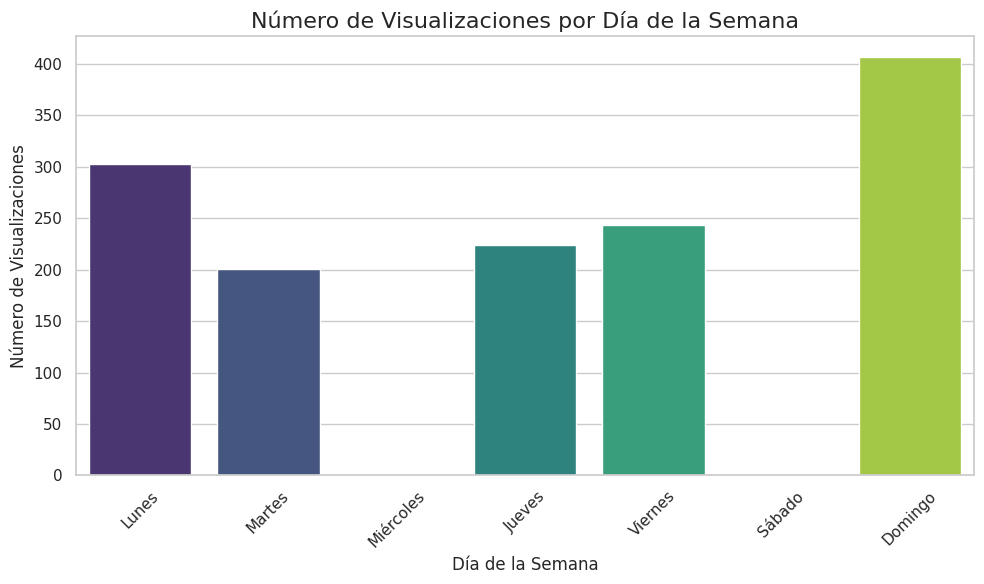

In [20]:
# --- Análisis: Visualizaciones por Día de la Semana ---

from matplotlib import ticker as mticker

print("\n--- Analizando Visualizaciones por Día de la Semana ---")

# Calcular el conteo de visualizaciones por día
conteo_por_dia = df['Dia_Semana'].value_counts().sort_index() # sort_index() usa el orden categórico definido antes

print("\nConteo por Día:")
print(conteo_por_dia)

# Crear el gráfico de barras
plt.figure(figsize=(10, 6)) # Tamaño de la figura

# Usamos seaborn para un gráfico más bonito
ax = sns.barplot(x=conteo_por_dia.index, y=conteo_por_dia.values, palette="viridis", order=dias_ordenados)

# Añadir títulos y etiquetas
plt.title('Número de Visualizaciones por Día de la Semana', fontsize=16)
plt.xlabel('Día de la Semana', fontsize=12)
plt.ylabel('Número de Visualizaciones', fontsize=12)
plt.xticks(rotation=45) # Rotar etiquetas del eje X si son largas

# Formatear el eje Y para mostrar números enteros (sin decimales)
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
# Opcional: añadir los valores encima de las barras
# for container in ax.containers:
#     ax.bar_label(container)

plt.tight_layout() # Ajustar layout para que no se corten las etiquetas
plt.show() # Mostrar el gráfico


--- Analizando Visualizaciones por Mes ---

Conteo por Mes:
Mes
Enero         331
Febrero       220
Marzo         216
Abril         233
Mayo           68
Junio          47
Julio         102
Agosto         72
Septiembre    136
Octubre       168
Noviembre      87
Diciembre     194
Name: count, dtype: int64


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_7668\25876889.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=conteo_por_mes.index, y=conteo_por_mes.values, palette="magma", order=meses_ordenados)


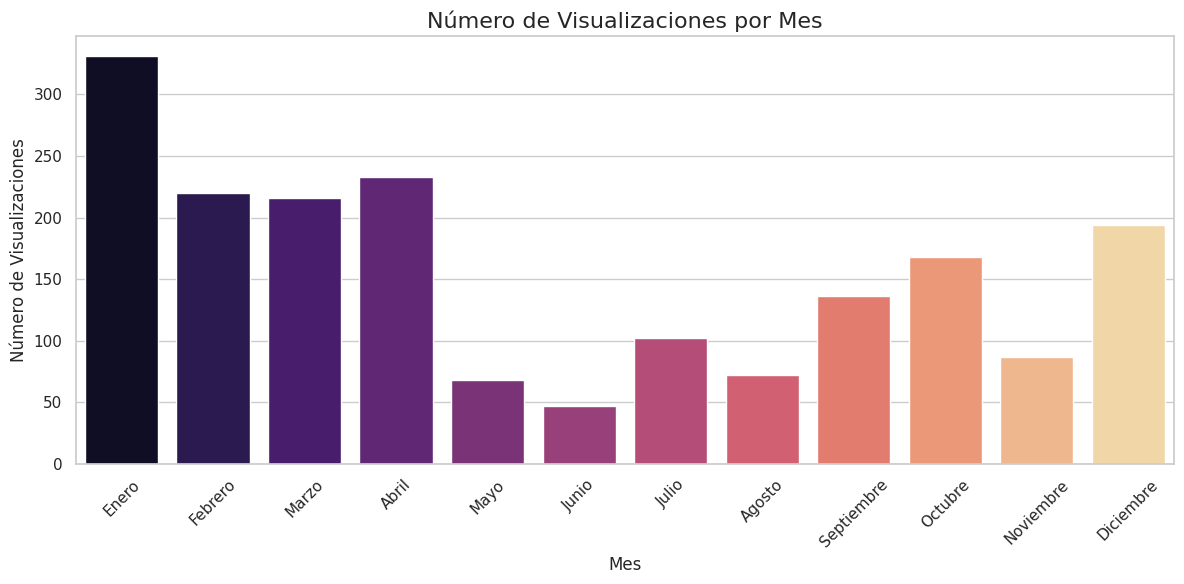

In [21]:
# --- Análisis: Visualizaciones por Mes ---

print("\n--- Analizando Visualizaciones por Mes ---")

# Calcular el conteo de visualizaciones por mes
conteo_por_mes = df['Mes'].value_counts().sort_index() # sort_index() usa el orden categórico

print("\nConteo por Mes:")
print(conteo_por_mes)

# Crear el gráfico de barras
plt.figure(figsize=(12, 6)) # Tamaño de la figura

ax = sns.barplot(x=conteo_por_mes.index, y=conteo_por_mes.values, palette="magma", order=meses_ordenados)

plt.title('Número de Visualizaciones por Mes', fontsize=16)
plt.xlabel('Mes', fontsize=12)
plt.ylabel('Número de Visualizaciones', fontsize=12)
plt.xticks(rotation=45)

# Formatear eje Y
ax.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
# Opcional: añadir los valores encima de las barras
# for container in ax.containers:
#     ax.bar_label(container)

plt.tight_layout()
plt.show()


--- Analizando Géneros Más Vistos ---

Conteo Total de Géneros (en todas las visualizaciones):
Generos_TMDb
Comedy                792
Drama                 787
Animation             461
Action & Adventure    346
Sci-Fi & Fantasy      321
Action                237
Adventure             225
Fantasy               203
Horror                123
Crime                 116
Mystery                94
Family                 92
Kids                   79
Documentary            62
Romance                54
Name: count, dtype: int64


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_7668\25251055.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_genres_to_plot.values, y=top_genres_to_plot.index, palette="rocket", orient='h')


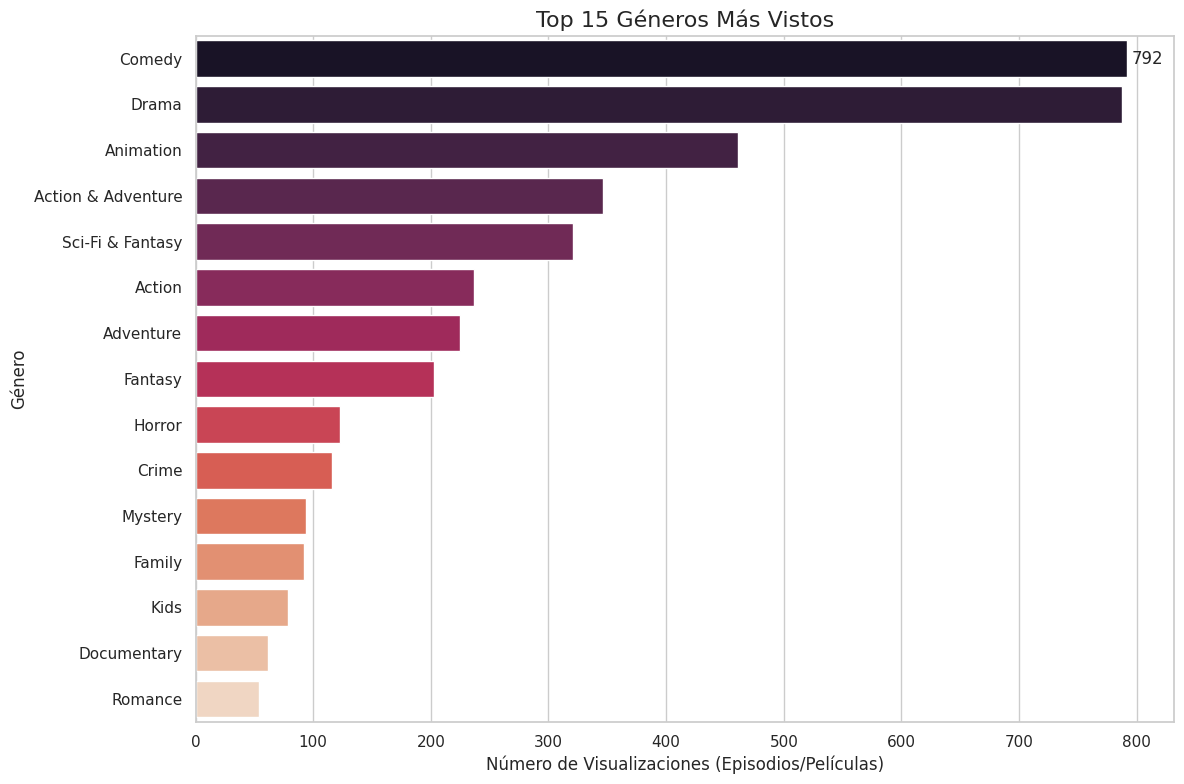

In [22]:
# --- Análisis: Géneros Más Vistos ---
from matplotlib import ticker as mticker

print("\n--- Analizando Géneros Más Vistos ---")

# 1. Preparar datos de Género
# Asegurarnos de que la columna existe y no tiene nulos (basado en Opción 2, filtramos NaNs)
if 'Generos_TMDb' in df.columns:
    df_genres = df.dropna(subset=['Generos_TMDb']) # Quitamos filas sin info de género
    # Separamos el string de géneros en una lista de géneros para cada fila
    # Usamos .str.split(', ') que divide donde encuentra coma seguida de espacio
    genres_list = df_genres['Generos_TMDb'].str.split(', ')
    
    # 2. "Explotar" para tener una fila por género
    # Esto crea una nueva Serie donde cada género de la lista tiene su propia entrada
    # manteniendo el índice original para saber a qué visualización pertenecía
    all_genres = genres_list.explode()
    
    # 3. Contar la frecuencia de cada género
    genre_counts = all_genres.value_counts()
    
    print("\nConteo Total de Géneros (en todas las visualizaciones):")
    # Mostramos los N más comunes, por ejemplo, los 15 primeros
    top_n = 15
    print(genre_counts.head(top_n))
    
    # 4. Visualizar los Géneros Top N
    plt.figure(figsize=(12, 8)) # Ajusta el tamaño si es necesario
    
    # Tomamos solo los N géneros más frecuentes para el gráfico
    top_genres_to_plot = genre_counts.head(top_n)
    
    ax = sns.barplot(x=top_genres_to_plot.values, y=top_genres_to_plot.index, palette="rocket", orient='h')
    
    plt.title(f'Top {top_n} Géneros Más Vistos', fontsize=16)
    plt.xlabel('Número de Visualizaciones (Episodios/Películas)', fontsize=12)
    plt.ylabel('Género', fontsize=12)
    
    # Formatear eje X
    ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
    # Añadir valores en las barras
    ax.bar_label(ax.containers[0], fmt='%d', padding=3)
    
    plt.tight_layout()
    plt.show()

else:
    print("La columna 'Generos_TMDb' no se encontró o fue eliminada.")


--- Analizando Proporción Películas vs. Series ---

Conteo por Tipo de Medio:
Tipo_Medio_TMDb
tv       1302
movie     554
NaN        18
Name: count, dtype: int64


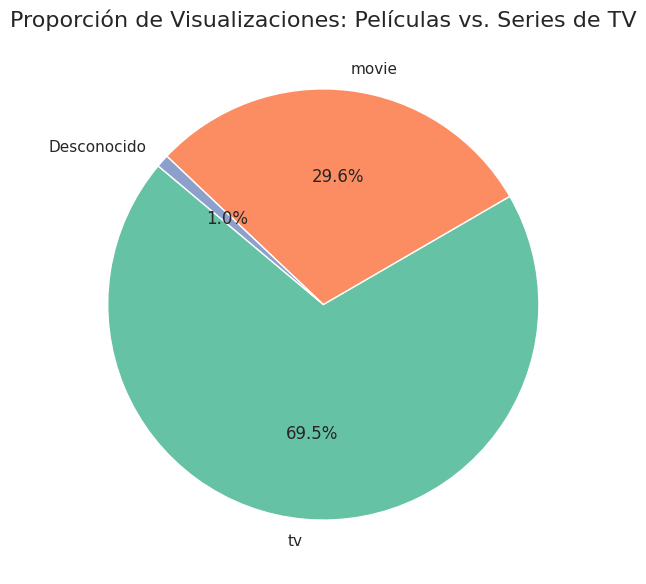

In [23]:
# --- Análisis: Proporción Películas vs. Series ---

print("\n--- Analizando Proporción Películas vs. Series ---")

# Contar cuántas visualizaciones corresponden a 'movie', 'tv' o 'Desconocido'/'NaN'
# Usamos dropna=False para incluir los NaNs si no los rellenaste
media_type_counts = df['Tipo_Medio_TMDb'].value_counts(dropna=False)

print("\nConteo por Tipo de Medio:")
print(media_type_counts)

# Crear un gráfico de pastel (pie chart) o de barras
plt.figure(figsize=(10, 7))

# Datos para el gráfico (excluyendo 'Desconocido' si lo hubiera y fuera pequeño)
labels = media_type_counts.index.to_series().map(lambda x: 'Desconocido' if pd.isna(x) else x) # Manejar NaN en etiquetas
sizes = media_type_counts.values

# Usamos un Pie chart
# 'autopct' muestra el porcentaje en el gráfico
# 'startangle' rota el inicio del gráfico
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Set2"))
plt.title('Proporción de Visualizaciones: Películas vs. Series de TV', fontsize=16)
# plt.axis('equal') # Asegura que el pie chart sea circular

# Alternativa: Gráfico de Barras (a menudo más fácil de leer que el de pastel)
# plt.figure(figsize=(8, 5))
# ax_bar = sns.barplot(x=labels, y=sizes, palette="Set2")
# plt.title('Visualizaciones por Tipo de Medio', fontsize=16)
# plt.ylabel('Número de Visualizaciones', fontsize=12)
# ax_bar.yaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
# ax_bar.bar_label(ax_bar.containers[0], fmt='%d')
# plt.tight_layout()

plt.show()

Note: you may need to restart the kernel to use updated packages.

--- Generando Nube de Palabras para Series Más Vistas ---

Top 10 Series Más Vistas (por número de episodios/visualizaciones):
Titulo_TMDb
Dr. Terrible's House of Horrible    176
Nuevo Rico Nuevo Pobre              107
The Walking Dead                     88
Suits                                78
Paquita la del Barrio                51
Money Heist                          46
Pasión de Gavilanes                  42
PAW Patrol                           30
KENGAN ASHURA                        28
Jujutsu Kaisen                       24
Name: count, dtype: int64



[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


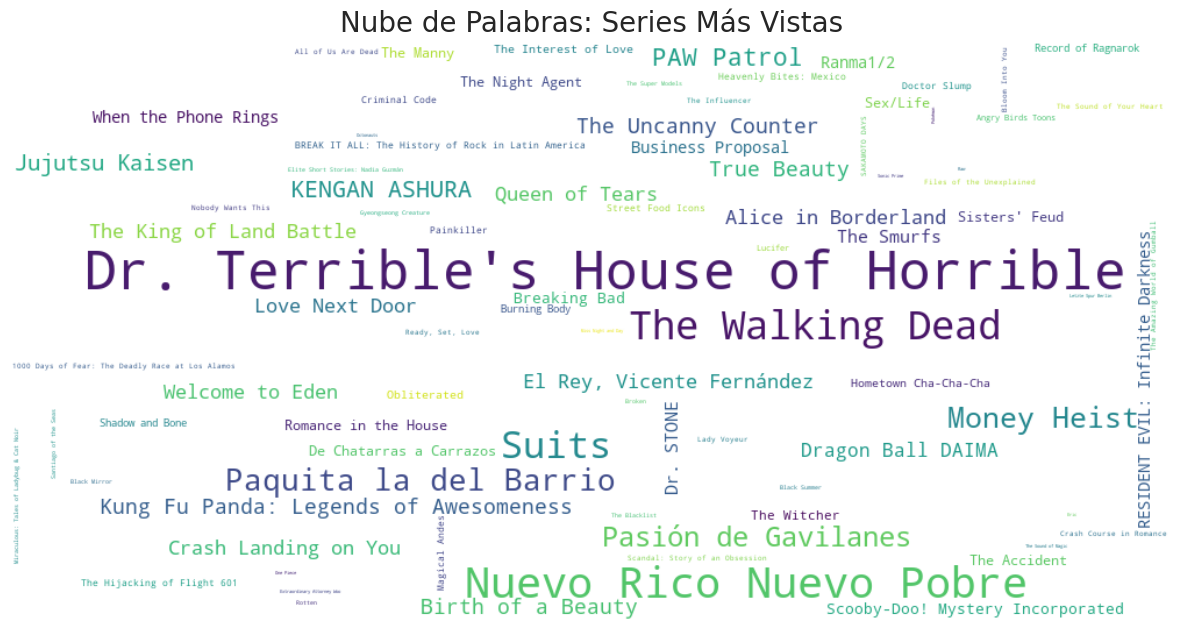

In [24]:
# --- Nube de Palabras: Series Más Vistas ---
# Asegurarse de que la librería wordcloud esté instalada
%pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

print("\n--- Generando Nube de Palabras para Series Más Vistas ---")

# Verificar si 'df' está definido
if 'df' not in globals():
    print("Error: El DataFrame 'df' no está definido. Asegúrate de ejecutar las celdas anteriores.")
else:
    # 1. Filtrar solo las visualizaciones de series de TV
    # Y asegurarnos de que tengan un título TMDb (quitamos NaNs si los hubiera)
    series_df = df[(df['Tipo_Medio_TMDb'] == 'tv') & (df['Titulo_TMDb'].notna())].copy()

    if series_df.empty:
        print("No se encontraron visualizaciones de series de TV con títulos válidos.")
    else:
        # 2. Contar la frecuencia de cada título de serie
        # Usamos Titulo_TMDb que debería ser el nombre canónico de la serie
        series_counts = series_df['Titulo_TMDb'].value_counts()
        
        print(f"\nTop 10 Series Más Vistas (por número de episodios/visualizaciones):")
        print(series_counts.head(10))
        
        # 3. Convertir las cuentas a un diccionario de frecuencias para la nube
        # WordCloud puede usar un diccionario: {'Palabra': frecuencia}
        series_freq_dict = series_counts.to_dict()
        
        # 4. Crear y mostrar la nube de palabras
        # Puedes ajustar width, height, background_color, colormap
        wordcloud = WordCloud(width=1000, height=500, background_color='white',
                              colormap='viridis', # Otras opciones: 'plasma', 'magma', 'cividis', etc.
                              max_words=100, # Limitar el número de palabras mostradas
                              contour_width=1, contour_color='steelblue',
                              prefer_horizontal=0.9 # Favorecer palabras horizontales
                             ).generate_from_frequencies(series_freq_dict)
                             
        # 5. Mostrar la imagen generada
        plt.figure(figsize=(15, 8)) # Tamaño de la figura que contiene la nube
        plt.imshow(wordcloud, interpolation='bilinear') # interpolation mejora la visualización
        plt.axis('off') # No mostrar ejes
        plt.title('Nube de Palabras: Series Más Vistas', fontsize=20)
        plt.show()


--- Generando Mapa de Calor: Visualizaciones por Mes y Año ---


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_7668\3562207413.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  views_by_month_year = df.groupby(['Anio', 'Mes'])['Fecha_Visualizacion'].count().unstack(fill_value=0)


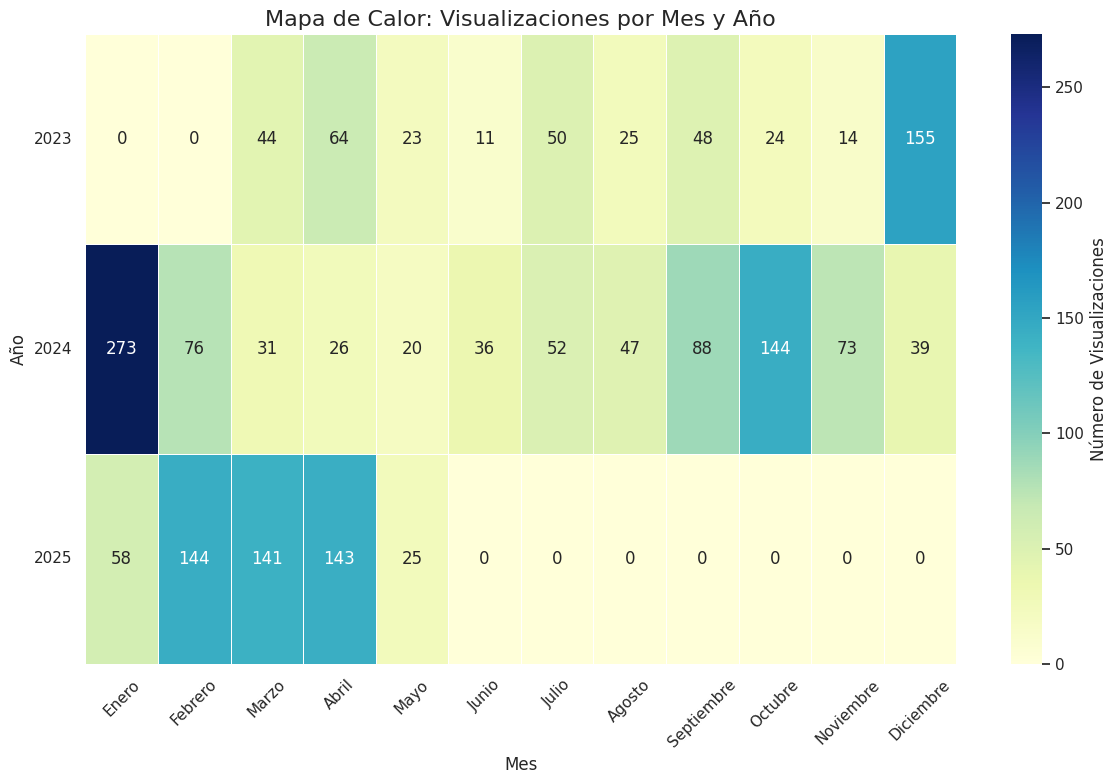

In [25]:
# --- Mapa de Calor: Visualizaciones por Mes y Año ---

print("\n--- Generando Mapa de Calor: Visualizaciones por Mes y Año ---")

# 1. Asegurarnos de tener las columnas 'Anio' y 'Mes' (o 'Mes_Num')
if 'Anio' not in df.columns or 'Mes' not in df.columns or 'Mes_Num' not in df.columns:
     print("Error: Faltan las columnas 'Anio' o 'Mes'/'Mes_Num' necesarias para el heatmap.")
else:
    # 2. Agrupar por Año y Mes, y contar visualizaciones
    # Usamos Mes_Num para poder ordenar correctamente después si fuera necesario
    views_by_month_year = df.groupby(['Anio', 'Mes'])['Fecha_Visualizacion'].count().unstack(fill_value=0)
    
    # (Opcional) Reordenar los meses si no se usó el tipo Categórico correctamente antes
    # Si los meses no están ordenados, descomenta y ajusta 'meses_ordenados'
    # try:
    #      views_by_month_year = views_by_month_year.reindex(columns=meses_ordenados, fill_value=0)
    # except NameError:
    #      print("Advertencia: No se pudo reordenar los meses, podrían aparecer desordenados.")

    # 3. Crear el mapa de calor
    plt.figure(figsize=(12, 8)) # Ajusta el tamaño según necesidad
    
    sns.heatmap(views_by_month_year, # La tabla pivotada con los conteos
                cmap="YlGnBu",     # Paleta de colores (otras: "viridis", "plasma", "coolwarm")
                linewidths=.5,     # Líneas entre celdas
                annot=True,        # Mostrar los números (conteos) en las celdas
                fmt="d",           # Formato de los números (d = entero)
                cbar_kws={'label': 'Número de Visualizaciones'} # Etiqueta para la barra de color
               )
               
    plt.title('Mapa de Calor: Visualizaciones por Mes y Año', fontsize=16)
    plt.xlabel('Mes', fontsize=12)
    plt.ylabel('Año', fontsize=12)
    plt.yticks(rotation=0) # Asegurar que los años se lean bien
    plt.xticks(rotation=45) # Rotar meses si es necesario
    
    plt.tight_layout()
    plt.show()

Construiremos una matriz donde tanto las filas como las columnas son géneros, y el valor en cada celda indicará cuántas veces ese par de géneros apareció junto en el mismo título. Luego visualizaremos esto como un mapa de calor.


--- Analizando Co-ocurrencia de Géneros ---
Analizando co-ocurrencia en 1026 visualizaciones con múltiples géneros.
Matriz binaria creada con 24 géneros únicos.
Filtrando heatmap para mostrar solo los 20 géneros más comunes (>= 10 ocurrencias).


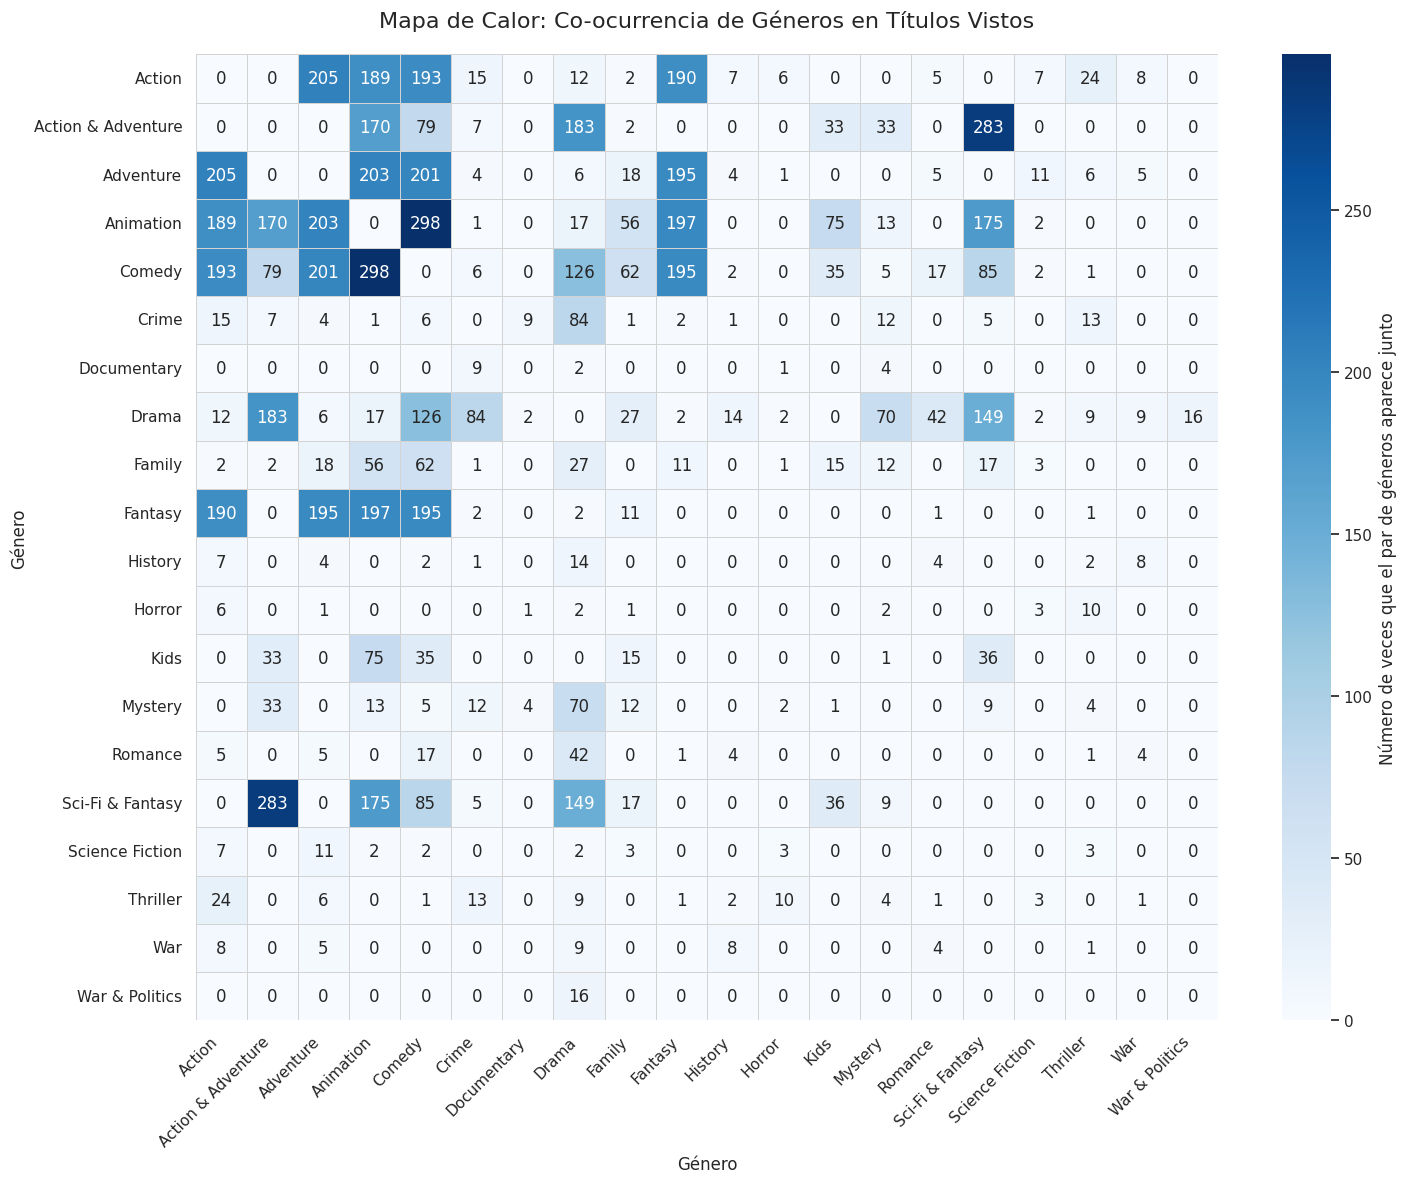

In [26]:
# --- Mapa de Calor: Co-ocurrencia de Géneros ---
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # Asegúrate de que pandas esté importado

print("\n--- Analizando Co-ocurrencia de Géneros ---")

# 1. Preparar Datos de Género
# Necesitamos la columna con los géneros como string separado por comas
genre_col = 'Generos_TMDb' 

if genre_col not in df.columns:
    print(f"Error: La columna '{genre_col}' no existe en el DataFrame.")
else:
    # Filtrar filas donde el género no es nulo ni 'Desconocido' (si lo hubieras rellenado)
    # Y que contengan al menos una coma (indicando múltiples géneros)
    df_multi_genre = df[df[genre_col].notna() & df[genre_col].str.contains(',', na=False)].copy()
    
    if df_multi_genre.empty:
        print("No se encontraron suficientes datos con múltiples géneros para analizar co-ocurrencia.")
    else:
        print(f"Analizando co-ocurrencia en {len(df_multi_genre)} visualizaciones con múltiples géneros.")
        
        # 2. Crear Matriz Binaria de Géneros
        # Usamos get_dummies: crea columnas para cada género encontrado, 
        # con 1 si está presente en la fila, 0 si no.
        # Asegúrate de que la separación sea correcta (coma y espacio)
        genre_binary_matrix = df_multi_genre[genre_col].str.get_dummies(sep=', ')
        
        print(f"Matriz binaria creada con {genre_binary_matrix.shape[1]} géneros únicos.")
        # print(genre_binary_matrix.head()) # Descomentar para ver cómo luce

        # 3. Calcular Matriz de Co-ocurrencia
        # Multiplicamos la transpuesta de la matriz por sí misma.
        # El resultado es una matriz cuadrada donde cada celda (i, j) 
        # contiene el número de veces que el género i y el género j aparecieron juntos.
        co_occurrence_matrix = genre_binary_matrix.T.dot(genre_binary_matrix)
        
        # 4. (Opcional) Poner ceros en la diagonal
        # La diagonal muestra cuántas veces apareció cada género en total (co-ocurrencia consigo mismo).
        # A menudo no es interesante para ver *correlaciones*, así que podemos quitarla visualmente.
        np.fill_diagonal(co_occurrence_matrix.values, 0) 
        
        # 5. (Opcional) Filtrar por géneros más frecuentes si la matriz es muy grande
        # Si tienes muchos géneros, el heatmap puede ser ilegible. 
        # Podríamos seleccionar solo los N géneros más comunes.
        min_occurrences = 10 # Ejemplo: solo considerar géneros que aparecen al menos 10 veces en total
        genre_totals = genre_binary_matrix.sum()
        common_genres = genre_totals[genre_totals >= min_occurrences].index.tolist()
        
        if len(common_genres) < co_occurrence_matrix.shape[0] and len(common_genres) > 1:
             print(f"Filtrando heatmap para mostrar solo los {len(common_genres)} géneros más comunes (>= {min_occurrences} ocurrencias).")
             co_occurrence_matrix_filtered = co_occurrence_matrix.loc[common_genres, common_genres]
        elif len(common_genres) <= 1:
             print("No hay suficientes géneros comunes para mostrar un heatmap filtrado significativo.")
             co_occurrence_matrix_filtered = co_occurrence_matrix # Mostrar todo si el filtro es muy estricto
        else:
             co_occurrence_matrix_filtered = co_occurrence_matrix # Mostrar todo si no hay muchos géneros

        # 6. Visualizar el Mapa de Calor
        if not co_occurrence_matrix_filtered.empty:
            plt.figure(figsize=(15, 12)) # Puede necesitar un tamaño grande si hay muchos géneros
            
            sns.heatmap(co_occurrence_matrix_filtered,
                        cmap="Blues",     # Paleta de colores (Blues, Greens, Reds...)
                        annot=True,       # Mostrar los números (conteos)
                        fmt=".0f",        # Formato entero para los números
                        linewidths=.5,
                        linecolor='lightgrey',
                        cbar_kws={'label': 'Número de veces que el par de géneros aparece junto'}
                       )
                       
            plt.title('Mapa de Calor: Co-ocurrencia de Géneros en Títulos Vistos', fontsize=16, pad=20)
            plt.xlabel('Género', fontsize=12)
            plt.ylabel('Género', fontsize=12)
            plt.xticks(rotation=45, ha='right') # Rotar etiquetas para mejor lectura
            plt.yticks(rotation=0)
            plt.tight_layout()
            plt.show()
        else:
            print("No se pudo generar el heatmap (matriz filtrada vacía o solo 1 género).")


--- Identificando las Series Más Vistas ---

Top 10 Series Más Vistas (por número de episodios/visualizaciones):
Titulo_TMDb
Dr. Terrible's House of Horrible    176
Nuevo Rico Nuevo Pobre              107
The Walking Dead                     88
Suits                                78
Paquita la del Barrio                51
Money Heist                          46
Pasión de Gavilanes                  42
PAW Patrol                           30
KENGAN ASHURA                        28
Jujutsu Kaisen                       24
Name: count, dtype: int64


C:\Users\jrgsi\AppData\Local\Temp\ipykernel_7668\3120641598.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_series_to_plot.values, y=top_series_to_plot.index, palette="viridis", orient='h')


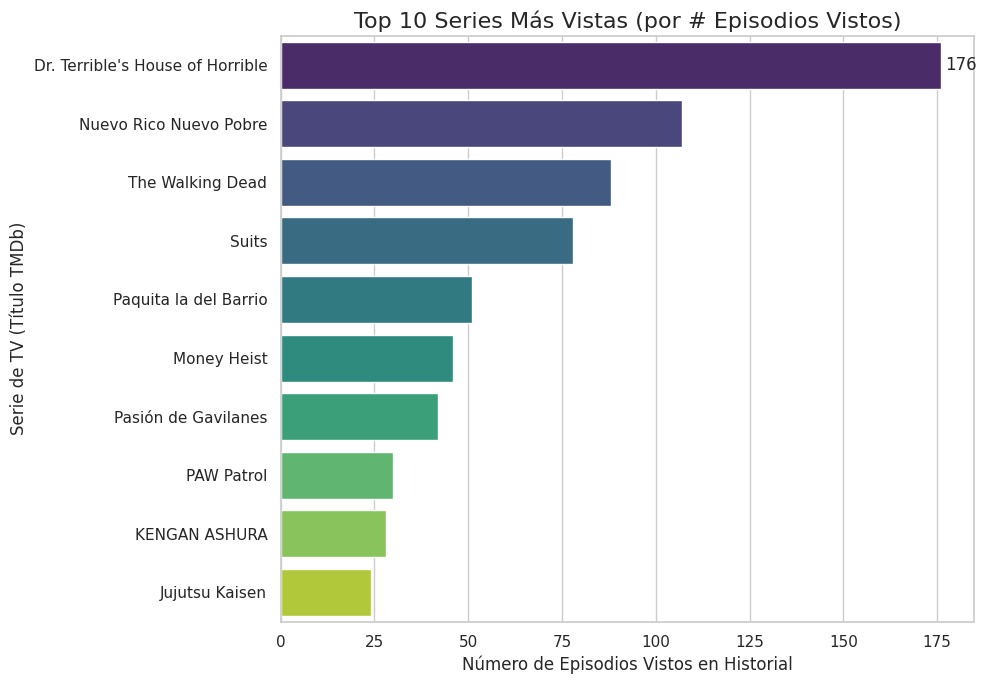

In [27]:
# --- Análisis: Top Series Más Vistas (por número de episodios/visualizaciones) ---

print("\n--- Identificando las Series Más Vistas ---")

# 1. Filtrar solo las visualizaciones de series de TV con título válido
series_df = df[(df['Tipo_Medio_TMDb'] == 'tv') & (df['Titulo_TMDb'].notna())].copy()

if series_df.empty:
    print("No se encontraron visualizaciones de series de TV con títulos válidos.")
else:
    # 2. Contar cuántas veces aparece cada título de serie (cada fila es una visualización/episodio)
    top_series_counts = series_df['Titulo_TMDb'].value_counts()
    
    # 3. Mostrar el Top N (ej. Top 10)
    n_top = 10
    print(f"\nTop {n_top} Series Más Vistas (por número de episodios/visualizaciones):")
    print(top_series_counts.head(n_top))
    
    # 4. Visualizar el Top N
    top_series_to_plot = top_series_counts.head(n_top)
    
    if not top_series_to_plot.empty:
        plt.figure(figsize=(10, 7)) # Ajusta tamaño si es necesario
        
        ax = sns.barplot(x=top_series_to_plot.values, y=top_series_to_plot.index, palette="viridis", orient='h')
        
        plt.title(f'Top {n_top} Series Más Vistas (por # Episodios Vistos)', fontsize=16)
        plt.xlabel('Número de Episodios Vistos en Historial', fontsize=12)
        plt.ylabel('Serie de TV (Título TMDb)', fontsize=12)
        
        # Formatear eje X y añadir etiquetas
        ax.xaxis.set_major_formatter(mticker.FormatStrFormatter('%d'))
        ax.bar_label(ax.containers[0], fmt='%d', padding=3)
        
        plt.tight_layout()
        plt.show()
    else:
        print("No hay suficientes datos de series para mostrar el gráfico.")